In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfcpu = pd.read_csv('C:/Users/rajab/KaggleX_Bipoc/data/raw/cpu4.csv')
dfcpu = dfcpu.sort_values(by='timestamp', ascending=True)
dfcpu = dfcpu.replace({'label': {0.0: False, 1.0: True}})

In [3]:
dfcpu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17568 entries, 0 to 17567
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  17568 non-null  int64  
 1   value      17568 non-null  float64
 2   label      17568 non-null  bool   
dtypes: bool(1), float64(1), int64(1)
memory usage: 428.9 KB


# Moving Average
Moving Average is the most common type of average used in Time Series problems. We perform the sum of recent data points and divide them by the time period. Further, we simply check if the new record is far from the expected value. The expected value range is computed using the formula:

expected value=  Moving Average + standard deviation * threshold; 

if moving average is out of the expected value range, we report as an anomaly.

In [4]:
dfcpu['moving_avg_3'] = dfcpu.iloc[:,1].rolling(window=3).mean()
dfcpu['moving_avg_3'].fillna(dfcpu['value'], inplace = True)
dfcpu['std'] = np.std(dfcpu['value'], ddof = 1)

In [5]:
dfcpu.head()

,timestamp,value,label,moving_avg_3,std
0,1469376000,0.847300,False,0.847300,1.000028
1,1469376300,-0.036137,False,-0.036137,1.000028
2,1469376600,0.074292,False,0.295152,1.000028
3,1469376900,0.074292,False,0.037482,1.000028
4,1469377200,-0.036137,False,0.037482,1.000028


In [6]:
dfcpu.loc[dfcpu['label'] == True].head()

,timestamp,value,label,moving_avg_3,std
395,1469494500,0.405581,True,0.405581,1.000028
396,1469494800,1.509878,True,0.810490,1.000028
397,1469495100,0.736871,True,0.884110,1.000028
886,1469641800,0.516011,True,0.442391,1.000028
887,1469642100,0.184722,True,0.368772,1.000028


In [7]:
threshold = 0.25

In [8]:
dfcpu['deviation'] = dfcpu['std'] * threshold
# dfcpu['expected_value'] = dfcpu['moving_avg_3'] + dfcpu['deviation']

In [9]:
dfcpu.loc[dfcpu['label'] == True].head()

,timestamp,value,label,moving_avg_3,std,deviation
395,1469494500,0.405581,True,0.405581,1.000028,0.250007
396,1469494800,1.509878,True,0.810490,1.000028,0.250007
397,1469495100,0.736871,True,0.884110,1.000028,0.250007
886,1469641800,0.516011,True,0.442391,1.000028,0.250007
887,1469642100,0.184722,True,0.368772,1.000028,0.250007


In [10]:
dfcpu.head()

,timestamp,value,label,moving_avg_3,std,deviation
0,1469376000,0.847300,False,0.847300,1.000028,0.250007
1,1469376300,-0.036137,False,-0.036137,1.000028,0.250007
2,1469376600,0.074292,False,0.295152,1.000028,0.250007
3,1469376900,0.074292,False,0.037482,1.000028,0.250007
4,1469377200,-0.036137,False,0.037482,1.000028,0.250007


In [11]:
dfcpu['pred_anamoly'] = (dfcpu['moving_avg_3'] > dfcpu['value'] + dfcpu['deviation'])  |\
(dfcpu['moving_avg_3']  < dfcpu['value'] - dfcpu['deviation'] )

In [12]:
dfcpu.head()

,timestamp,value,label,moving_avg_3,std,deviation,pred_anamoly
0,1469376000,0.847300,False,0.847300,1.000028,0.250007,False
1,1469376300,-0.036137,False,-0.036137,1.000028,0.250007,False
2,1469376600,0.074292,False,0.295152,1.000028,0.250007,False
3,1469376900,0.074292,False,0.037482,1.000028,0.250007,False
4,1469377200,-0.036137,False,0.037482,1.000028,0.250007,False


In [13]:
dfcpu.loc[dfcpu['label'] == True].head()

,timestamp,value,label,moving_avg_3,std,deviation,pred_anamoly
395,1469494500,0.405581,True,0.405581,1.000028,0.250007,False
396,1469494800,1.509878,True,0.810490,1.000028,0.250007,True
397,1469495100,0.736871,True,0.884110,1.000028,0.250007,False
886,1469641800,0.516011,True,0.442391,1.000028,0.250007,False
887,1469642100,0.184722,True,0.368772,1.000028,0.250007,False


In [14]:
print(dfcpu.pred_anamoly.value_counts())
print(dfcpu.pred_anamoly.value_counts(normalize=True))

False    17304
True       264
Name: pred_anamoly, dtype: int64
False    0.984973
True     0.015027
Name: pred_anamoly, dtype: float64


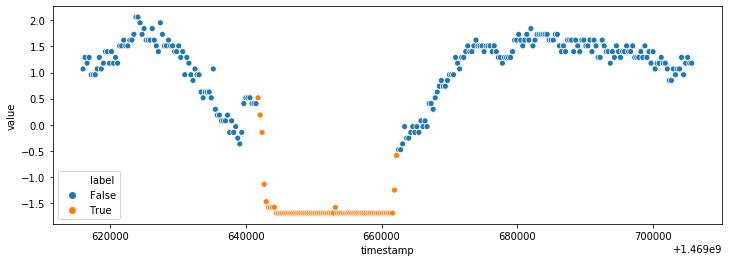

In [15]:
dfcpu_zoom = dfcpu[800:1100]
plt.figure(figsize=(12,4))
sns.scatterplot(data=dfcpu_zoom, x="timestamp", y="value", hue="label")
plt.show()

In [16]:
dfcpu['min'] = dfcpu['value'] - dfcpu['std']
dfcpu['max'] = dfcpu['value'] + dfcpu['std']

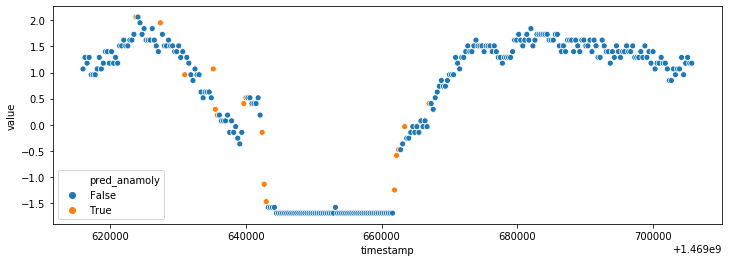

In [18]:


dfcpu_zoom = dfcpu[800:1100]

plt.figure(figsize=(12,4))
sns.scatterplot(data=dfcpu_zoom, x="timestamp", y="value", hue="pred_anamoly")
# plt.fill_between(dfcpu_zoom.timestamp, dfcpu_zoom.min, dfcpu_zoom.max, facecolor='green', alpha=0.2)
plt.show()

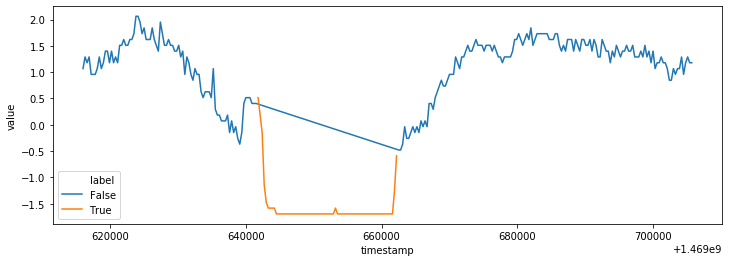

In [25]:
dfcpu_zoom = dfcpu[800:1100]
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=dfcpu_zoom, x="timestamp", y="value", hue="label",err_style="band", ci="sd", estimator="median",ax=ax)
# plt.fill_between(dfcpu_zoom.timestamp, dfcpu_zoom.min, dfcpu_zoom.max, facecolor='green', alpha=0.2)
plt.show()